# Toronto Neighborhood Web Scrapping

## 0. Preparation

### 0.1 Import required libraries

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

### 0.2 Get the URL and create Beautiful Soup Object

In [2]:
URL = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page = requests.get(URL)

In [3]:
soup = BeautifulSoup(page.content, 'html.parser')

### 0.3 Get the Table from Website

In [4]:
table = soup.find_all('table')

In [5]:
len(table)

3

In [6]:
table_raw = pd.read_html(str(table[0]), flavor='bs4')[0]
table_raw

,0,1,2,3,4,5,6,7,8
0,M1ANot assigned,M2ANot assigned,M3ANorth York(Parkwoods),M4ANorth York(Victoria Village),M5ADowntown Toronto(Regent Park / Harbourfront),M6ANorth York(Lawrence Manor / Lawrence Heights),M7AQueen's Park(Ontario Provincial Government),M8ANot assigned,M9AEtobicoke(Islington Avenue)
1,M1BScarborough(Malvern / Rouge),M2BNot assigned,M3BNorth York(Don Mills)North,M4BEast York(Parkview Hill / Woodbine Gardens),"M5BDowntown Toronto(Garden District, Ryerson)",M6BNorth York(Glencairn),M7BNot assigned,M8BNot assigned,M9BEtobicoke(West Deane Park / Princess Garden...
2,M1CScarborough(Rouge Hill / Port Union / Highl...,M2CNot assigned,M3CNorth York(Don Mills)South(Flemingdon Park),M4CEast York(Woodbine Heights),M5CDowntown Toronto(St. James Town),M6CYork(Humewood-Cedarvale),M7CNot assigned,M8CNot assigned,M9CEtobicoke(Eringate / Bloordale Gardens / Ol...
3,M1EScarborough(Guildwood / Morningside / West ...,M2ENot assigned,M3ENot assigned,M4EEast Toronto(The Beaches),M5EDowntown Toronto(Berczy Park),M6EYork(Caledonia-Fairbanks),M7ENot assigned,M8ENot assigned,M9ENot assigned
4,M1GScarborough(Woburn),M2GNot assigned,M3GNot assigned,M4GEast York(Leaside),M5GDowntown Toronto(Central Bay Street),M6GDowntown Toronto(Christie),M7GNot assigned,M8GNot assigned,M9GNot assigned
5,M1HScarborough(Cedarbrae),M2HNorth York(Hillcrest Village),M3HNorth York(Bathurst Manor / Wilson Heights ...,M4HEast York(Thorncliffe Park),M5HDowntown Toronto(Richmond / Adelaide / King),M6HWest Toronto(Dufferin / Dovercourt Village),M7HNot assigned,M8HNot assigned,M9HNot assigned
6,M1JScarborough(Scarborough Village),M2JNorth York(Fairview / Henry Farm / Oriole),M3JNorth York(Northwood Park / York University),M4JEast YorkEast Toronto(The Danforth East),M5JDowntown Toronto(Harbourfront East / Union ...,M6JWest Toronto(Little Portugal / Trinity),M7JNot assigned,M8JNot assigned,M9JNot assigned
7,M1KScarborough(Kennedy Park / Ionview / East B...,M2KNorth York(Bayview Village),M3KNorth York(Downsview)East (CFB Toronto),M4KEast Toronto(The Danforth West / Riverdale),M5KDowntown Toronto(Toronto Dominion Centre / ...,M6KWest Toronto(Brockton / Parkdale Village / ...,M7KNot assigned,M8KNot assigned,M9KNot assigned
8,M1LScarborough(Golden Mile / Clairlea / Oakridge),M2LNorth York(York Mills / Silver Hills),M3LNorth York(Downsview)West,M4LEast Toronto(India Bazaar / The Beaches West),M5LDowntown Toronto(Commerce Court / Victoria ...,M6LNorth York(North Park / Maple Leaf Park / U...,M7LNot assigned,M8LNot assigned,M9LNorth York(Humber Summit)
9,M1MScarborough(Cliffside / Cliffcrest / Scarbo...,M2MNorth York(Willowdale / Newtonbrook),M3MNorth York(Downsview)Central,M4MEast Toronto(Studio District),M5MNorth York(Bedford Park / Lawrence Manor East),M6MYork(Del Ray / Mount Dennis / Keelsdale and...,M7MNot assigned,M8MNot assigned,M9MNorth York(Humberlea / Emery)


### 0.4 Testing of Preprocessing for One Column

Because the table from wikipedia page consist of multiple row and column to be processed
\
In this case we try to extract the informastion from the first column, which is M1... code

In [7]:
# get the first column
# split the neighborhood column with '(' delimiter
M1_raw = table_raw[0].str.split('(',n = 1, expand = True)
M1_raw

,0,1
0,M1ANot assigned,None
1,M1BScarborough,Malvern / Rouge)
2,M1CScarborough,Rouge Hill / Port Union / Highland Creek)
3,M1EScarborough,Guildwood / Morningside / West Hill)
4,M1GScarborough,Woburn)
5,M1HScarborough,Cedarbrae)
6,M1JScarborough,Scarborough Village)
7,M1KScarborough,Kennedy Park / Ionview / East Birchmount Park)
8,M1LScarborough,Golden Mile / Clairlea / Oakridge)
9,M1MScarborough,Cliffside / Cliffcrest / Scarborough Village W...


In [8]:
# Extract the first 3 character form first column, to get the PostalCode
M1_raw[2] = M1_raw[0].str[0:3]

In [9]:
# Extract the borough, which is start from the 4th character from the first column
M1_raw[3] = M1_raw[0].str.slice(start=3)

In [10]:
# remove the ')' character on the tail of the neighborhood column (second column)
M1_raw[1] = M1_raw[1].str.replace(')','',regex=True)

In [11]:
# copy the neighborhood column (second column) to the right column
M1_raw[4] = M1_raw[1]

In [12]:
M1_raw

,0,1,2,3,4
0,M1ANot assigned,None,M1A,Not assigned,None
1,M1BScarborough,Malvern / Rouge,M1B,Scarborough,Malvern / Rouge
2,M1CScarborough,Rouge Hill / Port Union / Highland Creek,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
3,M1EScarborough,Guildwood / Morningside / West Hill,M1E,Scarborough,Guildwood / Morningside / West Hill
4,M1GScarborough,Woburn,M1G,Scarborough,Woburn
5,M1HScarborough,Cedarbrae,M1H,Scarborough,Cedarbrae
6,M1JScarborough,Scarborough Village,M1J,Scarborough,Scarborough Village
7,M1KScarborough,Kennedy Park / Ionview / East Birchmount Park,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park
8,M1LScarborough,Golden Mile / Clairlea / Oakridge,M1L,Scarborough,Golden Mile / Clairlea / Oakridge
9,M1MScarborough,Cliffside / Cliffcrest / Scarborough Village West,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West


In [13]:
# drop the first and the second column
M1_test = M1_raw.drop([0,1], axis = 1)
M1_test

,2,3,4
0,M1A,Not assigned,None
1,M1B,Scarborough,Malvern / Rouge
2,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
3,M1E,Scarborough,Guildwood / Morningside / West Hill
4,M1G,Scarborough,Woburn
5,M1H,Scarborough,Cedarbrae
6,M1J,Scarborough,Scarborough Village
7,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park
8,M1L,Scarborough,Golden Mile / Clairlea / Oakridge
9,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West


##### The Pre-Processing for the first column seems to work properly, we can use the same algorithm to do the Pre-Processing for all column

### 0.5 Preprocessing for all column

In [14]:
Tor_Post = pd.DataFrame()

for col in table_raw:
    Post_per_row = table_raw[col].str.split('(',n = 1, expand = True)
    Post_per_row[2] = Post_per_row[0].str[0:3]
    Post_per_row[3] = Post_per_row[0].str.slice(start=3)
    Post_per_row[1] = Post_per_row[1].str.replace(')','',regex=True)
    Post_per_row[4] = Post_per_row[1]
    Post_per_row = Post_per_row.drop([0,1], axis = 1)
    Tor_Post = Tor_Post.append(Post_per_row)

In [15]:
Tor_Post

,2,3,4
0,M1A,Not assigned,None
1,M1B,Scarborough,Malvern / Rouge
2,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
3,M1E,Scarborough,Guildwood / Morningside / West Hill
4,M1G,Scarborough,Woburn
...,...,...,...
15,M9V,Etobicoke,South Steeles / Silverstone / Humbergate / Jam...
16,M9W,EtobicokeNorthwest,Clairville / Humberwood / Woodbine Downs / Wes...
17,M9X,Not assigned,None
18,M9Y,Not assigned,None


In [16]:
Tor_Post =  Tor_Post.reset_index(drop=True)

### 0.5.1 Checking for the Not assigned borough

In [17]:
Tor_Post[Tor_Post[3]=='Not assigned']

,2,3,4
0,M1A,Not assigned,None
18,M1Y,Not assigned,None
19,M1Z,Not assigned,None
20,M2A,Not assigned,None
21,M2B,Not assigned,None
...,...,...,...
173,M9S,Not assigned,None
174,M9T,Not assigned,None
177,M9X,Not assigned,None
178,M9Y,Not assigned,None


Seems that there are 77 Not assigned borough

### 0.5.2 Drop the Not assigned borough

In [18]:
Tor_Post_assigned = Tor_Post.drop(Tor_Post[Tor_Post[3]=='Not assigned'].index)

In [19]:
Tor_Post_assigned

,2,3,4
1,M1B,Scarborough,Malvern / Rouge
2,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
3,M1E,Scarborough,Guildwood / Morningside / West Hill
4,M1G,Scarborough,Woburn
5,M1H,Scarborough,Cedarbrae
...,...,...,...
170,M9N,York,Weston
171,M9P,Etobicoke,Westmount
172,M9R,Etobicoke,Kingsview Village / St. Phillips / Martin Grov...
175,M9V,Etobicoke,South Steeles / Silverstone / Humbergate / Jam...


### 0.5.3 Check for the Not asigned Neighborhood

In [20]:
Tor_Post_assigned[Tor_Post_assigned[4] == 'Not assigned']

,2,3,4


Seems that there's no Not assigned Neighborhood for Assigned Borough

### 0.5.4 Create the clean DataFrame and reset the index

In [21]:
Toronto_PostalCode = Tor_Post_assigned.reset_index(drop=True).rename(columns={2:'PostalCode',3: 'Borough',4:'Neighborhood'})

In [22]:
Toronto_PostalCode.head()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,Malvern / Rouge
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,Scarborough,Guildwood / Morningside / West Hill
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [23]:
# change the / character in Neighborhood column to ','
Toronto_PostalCode['Neighborhood'] = Toronto_PostalCode['Neighborhood'].str.replace(' /', ',')

In [24]:
Toronto_PostalCode

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


### 0.5.5 Data Cleaning for the borough

In [25]:
Toronto_PostalCode['Borough'].unique()

array(['Scarborough', 'North York', 'East York', 'East Toronto',
       'East YorkEast Toronto', 'Central Toronto', 'Downtown Toronto',
       'Downtown TorontoStn A PO Boxes25 The Esplanade', 'York',
       'West Toronto', "Queen's Park",
       'MississaugaCanada Post Gateway Processing Centre',
       'East TorontoBusiness reply mail Processing Centre969 Eastern',
       'Etobicoke', 'EtobicokeNorthwest'], dtype=object)

In [26]:
# change East YorkEast Toronto to East Toronto
Toronto_PostalCode['Borough'].replace({'East YorkEast Toronto':'East York'}, inplace=True)

# change Downtown TorontoStn A PO Boxes25 The Esplanade to Downtown Toronto
Toronto_PostalCode['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto'}, inplace=True)

# change MississaugaCanada Post Gateway Processing Centre to Mississauga
Toronto_PostalCode['Borough'].replace({'MississaugaCanada Post Gateway Processing Centre':'Mississauga'}, inplace=True)

# change East TorontoBusiness reply mail Processing Centre969 Eastern Processing Centre to East Toronto
Toronto_PostalCode['Borough'].replace({'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto'}, inplace=True)

# change EtobicokeNorthwest to Etobicoke
Toronto_PostalCode['Borough'].replace({'EtobicokeNorthwest':'Etobicoke'}, inplace=True)

Toronto_PostalCode['Borough'].unique()

array(['Scarborough', 'North York', 'East York', 'East Toronto',
       'Central Toronto', 'Downtown Toronto', 'York', 'West Toronto',
       "Queen's Park", 'Mississauga', 'Etobicoke'], dtype=object)

In [27]:
Toronto_PostalCode.shape

(103, 3)

### 0.6 Add Geo Data

### 0.6.1 Download the Geospatial Data

In [28]:
import urllib.request

In [29]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv'
urllib.request.urlretrieve(url, 'Geo_Data_Toronto.csv')

('Geo_Data_Toronto.csv', <http.client.HTTPMessage at 0x2607d3f9f48>)

### 0.6.2 Read the Geo Data to DataFrame

In [30]:
Geo_Data_Toronto = pd.read_csv('Geo_Data_Toronto.csv')
Geo_Data_Toronto.rename(columns = {'Postal Code':'PostalCode'}, inplace=True)
Geo_Data_Toronto

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


### 0.6.3 Merge the Toronto_PostalCode DataFrame with Geo_Data_Toronto DataFrame

In [31]:
Toronto_data = Toronto_PostalCode.merge(Geo_Data_Toronto, on='PostalCode')

In [32]:
Toronto_data

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437


In [33]:
Toronto_data.shape

(103, 5)

# 

# 1. Explore Toronto

## 1.1 Create Toronto Map

In [34]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [35]:
address = 'Toronto, M'

geolocator = Nominatim(user_agent="t_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.7263287, -79.4518396.


In [36]:
import folium # map rendering library

In [37]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Toronto_data['Latitude'], Toronto_data['Longitude'], Toronto_data['Borough'], Toronto_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

# 

# 2. Explore Old Toronto

Form Wikipedia page on list of Borough in Toronto, The Old Toronto is Group of Borough that are have 'Toronto' Last Name
\
Which are 'East Toronto', 'Central Toronto', 'Downtown Toronto', and 'West Toronto'

## 2.1 Create Old Toronto Data

In [38]:
selected_boroughs = ('East Toronto', 'Central Toronto', 'Downtown Toronto', 'West Toronto')

old_tor_data = pd.DataFrame()
for i in selected_boroughs:
    temp_tor = Toronto_data[Toronto_data['Borough']== i]
    old_tor_data = old_tor_data.append(temp_tor).reset_index(drop = True)

old_tor_data

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M7Y,East Toronto,Enclave of M4L,43.662744,-79.321558
5,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
6,M4P,Central Toronto,Davisville North,43.712751,-79.390197
7,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
8,M4S,Central Toronto,Davisville,43.704324,-79.388790
9,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160


In [39]:
address = 'Central Toronto, M'

geolocator = Nominatim(user_agent="t_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Old Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Old Toronto are 43.7263287, -79.4518396.


## 2.2 Create Old Toronto Map

In [40]:
# create map of Toronto using latitude and longitude values
map_old_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(old_tor_data['Latitude'], old_tor_data['Longitude'], old_tor_data['Borough'], old_tor_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_old_toronto)  
    
map_old_toronto

## 2.3 Preparation of Exploring The Neighborhood in Old Toronto

### 2.3.1 Define Foursquare Credentials and Version

In [41]:
CLIENT_ID = '1BCHB0C1RPZKMYMFZNFR5M1JQLSGSKPSNOCOLZLDYV0U1PUT' # your Foursquare ID
CLIENT_SECRET = 'RYUK0Q03OPC4WN5OWIP0SDZ2A4K02KDAL3ZTXJHW5Z4KKZDD' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1BCHB0C1RPZKMYMFZNFR5M1JQLSGSKPSNOCOLZLDYV0U1PUT
CLIENT_SECRET:RYUK0Q03OPC4WN5OWIP0SDZ2A4K02KDAL3ZTXJHW5Z4KKZDD


### 2.3.2 Testing Exploring The First Neighborhood in Old Toronto

In [42]:
# Testing
old_tor_data.loc[0, 'Neighborhood']

'The Beaches'

In [43]:
neighborhood_latitude = old_tor_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = old_tor_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = old_tor_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of The Beaches are 43.6763574, -79.2930312.


In [44]:
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=1BCHB0C1RPZKMYMFZNFR5M1JQLSGSKPSNOCOLZLDYV0U1PUT&client_secret=RYUK0Q03OPC4WN5OWIP0SDZ2A4K02KDAL3ZTXJHW5Z4KKZDD&v=20180605&ll=43.6763574,-79.2930312&radius=500&limit=100'

In [45]:
results = requests.get(url).json()

In [46]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [47]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [48]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

c:\users\husen wahyu\anaconda3\envs\mlpip\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Glen Manor Ravine,Trail,43.676821,-79.293942
1,The Big Carrot Natural Food Market,Health Food Store,43.678879,-79.297734
2,Grover Pub and Grub,Pub,43.679181,-79.297215
3,Upper Beaches,Neighborhood,43.680563,-79.292869
4,Dip 'n Sip,Coffee Shop,43.678897,-79.297745


#### Exploring of the first neighborhood in old toronto (The Beaches) is done

# 

# 3. Explore the Neighborhood in Old Toronto

## 3.1 Do The Same Algorithm to All Neighborhood in Old Toronto

In [49]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [50]:
old_toronto_venues = getNearbyVenues(names=old_tor_data['Neighborhood'],
                                   latitudes=old_tor_data['Latitude'],
                                   longitudes=old_tor_data['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Enclave of M4L
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Roselawn
Forest Hill North & West
The Annex, North Midtown, Yorkville
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Enclave of M5E
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High Park, The Junction Sout

In [51]:
old_toronto_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,The Beaches,43.676357,-79.293031,Dip 'n Sip,43.678897,-79.297745,Coffee Shop
...,...,...,...,...,...,...,...
1560,"Runnymede, Swansea",43.651571,-79.484450,Supper Solved,43.648781,-79.485233,Restaurant
1561,"Runnymede, Swansea",43.651571,-79.484450,Cards 'N' Such,43.650497,-79.480778,Post Office
1562,"Runnymede, Swansea",43.651571,-79.484450,(The New) Moksha Yoga Bloor West,43.648658,-79.485242,Yoga Studio
1563,"Runnymede, Swansea",43.651571,-79.484450,Think Fitness,43.647966,-79.486462,Gym


In [52]:
old_toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,59,59,59,59,59,59
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",15,15,15,15,15,15
Central Bay Street,61,61,61,61,61,61
Christie,16,16,16,16,16,16
Church and Wellesley,79,79,79,79,79,79
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,34,34,34,34,34,34
Davisville North,7,7,7,7,7,7


In [53]:
print('There are {} uniques categories.'.format(len(old_toronto_venues['Venue Category'].unique())))

There are 230 uniques categories.


# 

# 4. Analyze Each Neighborhood

In [54]:
# one hot encoding
old_toronto_onehot = pd.get_dummies(old_toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
old_toronto_onehot['Neighborhood'] = old_toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [old_toronto_onehot.columns[-1]] + list(old_toronto_onehot.columns[:-1])
old_toronto_onehot = old_toronto_onehot[fixed_columns]

old_toronto_onehot.head()

,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
old_toronto_venues.shape

(1565, 7)

In [56]:
old_toronto_grouped = old_toronto_onehot.groupby('Neighborhood').mean().reset_index()
old_toronto_grouped

,Neighborhood,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.016949,0.00000,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000
2,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.000000,0.000000,0.066667,0.066667,0.066667,0.133333,0.2,0.133333,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000
3,Central Bay Street,0.016393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.016393,0.00000,0.000000,0.016393
4,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000
5,Church and Wellesley,0.025316,0.012658,0.012658,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.012658,0.012658,0.00000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000
6,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.020000,0.00000,0.000000,0.010000
7,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.029412,0.000000,0.00,0.000000,0.00000,0.000000,0.000000
8,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000
9,"Dufferin, Dovercourt Village",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000


In [57]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [58]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = old_toronto_grouped['Neighborhood']

for ind in np.arange(old_toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(old_toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Farmers Market,Seafood Restaurant,Cheese Shop,Restaurant,Beer Bar,Pharmacy,Bistro
1,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Coffee Shop,Yoga Studio,Italian Restaurant,Burrito Place,Stadium,Furniture / Home Store,Bar,Bakery
2,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Terminal,Airport Lounge,Boat or Ferry,Rental Car Location,Sculpture Garden,Harbor / Marina,Plane,Airport Gate,Airport Food Court
3,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Japanese Restaurant,Salad Place,Bubble Tea Shop,Burger Joint,Thai Restaurant,Portuguese Restaurant
4,Christie,Grocery Store,Café,Park,Athletics & Sports,Baby Store,Nightclub,Candy Store,Italian Restaurant,Restaurant,Coffee Shop
5,Church and Wellesley,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Restaurant,Gay Bar,Mediterranean Restaurant,Pub,Smoke Shop,Fast Food Restaurant,Men's Store
6,"Commerce Court, Victoria Hotel",Coffee Shop,Restaurant,Café,Hotel,Gym,Italian Restaurant,Deli / Bodega,American Restaurant,Seafood Restaurant,Japanese Restaurant
7,Davisville,Pizza Place,Sandwich Place,Dessert Shop,Coffee Shop,Gym,Sushi Restaurant,Italian Restaurant,Café,Indian Restaurant,Diner
8,Davisville North,Hotel,Park,Food & Drink Shop,Breakfast Spot,Department Store,Sandwich Place,Yoga Studio,Museum,Mexican Restaurant,Middle Eastern Restaurant
9,"Dufferin, Dovercourt Village",Pharmacy,Bakery,Liquor Store,Music Venue,Bank,Bar,Café,Supermarket,Park,Grocery Store


# 

# 5. Clustering Neighborhood

In [59]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline 

In [60]:
old_toronto_grouped_clustering_test = old_toronto_grouped.drop('Neighborhood', 1)

num_k = []
K = range(1,16)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(old_toronto_grouped_clustering_test)
    num_k.append(kmeanModel.inertia_)

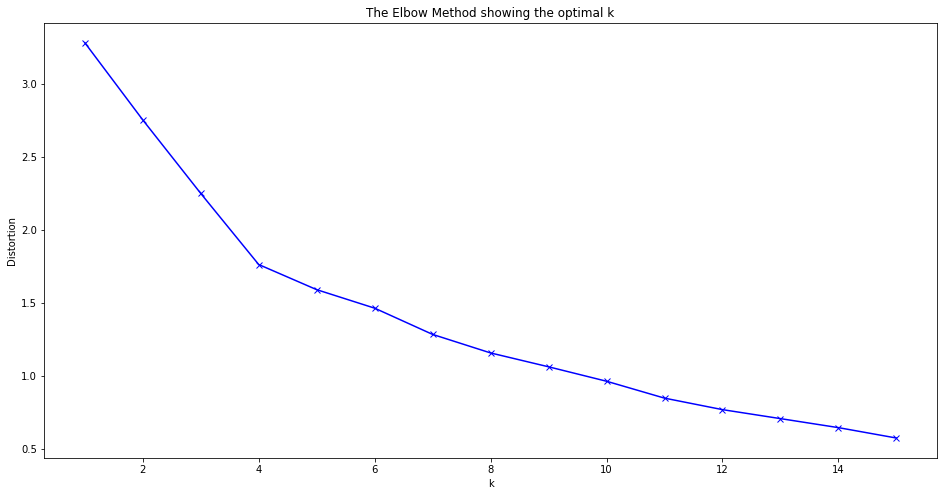

In [61]:
plt.figure(figsize=(16,8))
plt.plot(K, num_k, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the elbow method, the number of optimum K is 4

In [62]:
# set number of clusters
kclusters = 4

old_toronto_grouped_clustering = old_toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(old_toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [63]:
old_toronto_grouped.head()

,Neighborhood,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar
0,Berczy Park,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.016949,0.0,0.0,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.043478,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.0,0.0,0.066667,0.066667,0.066667,0.133333,0.2,0.133333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
3,Central Bay Street,0.016393,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.016393,0.0,0.0,0.016393
4,Christie,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


In [64]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted.head(3)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Farmers Market,Seafood Restaurant,Cheese Shop,Restaurant,Beer Bar,Pharmacy,Bistro
1,0,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Coffee Shop,Yoga Studio,Italian Restaurant,Burrito Place,Stadium,Furniture / Home Store,Bar,Bakery
2,0,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Terminal,Airport Lounge,Boat or Ferry,Rental Car Location,Sculpture Garden,Harbor / Marina,Plane,Airport Gate,Airport Food Court


In [65]:
# merge old_toronto_grouped with old_T_data to add latitude/longitude for each neighborhood
old_toronto_merged = old_tor_data

# merge old_toronto_grouped with old_T_data to add latitude/longitude for each neighborhood
old_toronto_merged = old_toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

old_toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Health Food Store,Trail,Pub,Coffee Shop,Asian Restaurant,Other Great Outdoors,Music Store,Men's Store,Mexican Restaurant,Middle Eastern Restaurant
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,Greek Restaurant,Coffee Shop,Italian Restaurant,Furniture / Home Store,Ice Cream Shop,Yoga Studio,Bookstore,Lounge,Fruit & Vegetable Store,Spa
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,0,Park,Fast Food Restaurant,Pizza Place,Italian Restaurant,Pub,Restaurant,Movie Theater,Sandwich Place,Brewery,Fish & Chips Shop
3,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Coffee Shop,Brewery,Gastropub,Café,Bakery,American Restaurant,Cheese Shop,Clothing Store,Comfort Food Restaurant,Convenience Store
4,M7Y,East Toronto,Enclave of M4L,43.662744,-79.321558,0,Yoga Studio,Auto Workshop,Garden Center,Light Rail Station,Fast Food Restaurant,Farmers Market,Park,Pizza Place,Restaurant,Burrito Place


In [66]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [67]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(old_toronto_merged['Latitude'], old_toronto_merged['Longitude'], old_toronto_merged['Neighborhood'], 
                                  old_toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# 

# 6. Examine Cluster

#### Cluster 1

In [68]:
old_toronto_merged.loc[old_toronto_merged['Cluster Labels'] == 0, old_toronto_merged.columns[[1] + list(range(5, old_toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East Toronto,0,Health Food Store,Trail,Pub,Coffee Shop,Asian Restaurant,Other Great Outdoors,Music Store,Men's Store,Mexican Restaurant,Middle Eastern Restaurant
1,East Toronto,0,Greek Restaurant,Coffee Shop,Italian Restaurant,Furniture / Home Store,Ice Cream Shop,Yoga Studio,Bookstore,Lounge,Fruit & Vegetable Store,Spa
2,East Toronto,0,Park,Fast Food Restaurant,Pizza Place,Italian Restaurant,Pub,Restaurant,Movie Theater,Sandwich Place,Brewery,Fish & Chips Shop
3,East Toronto,0,Coffee Shop,Brewery,Gastropub,Café,Bakery,American Restaurant,Cheese Shop,Clothing Store,Comfort Food Restaurant,Convenience Store
4,East Toronto,0,Yoga Studio,Auto Workshop,Garden Center,Light Rail Station,Fast Food Restaurant,Farmers Market,Park,Pizza Place,Restaurant,Burrito Place
5,Central Toronto,0,Park,Bus Line,Swim School,Yoga Studio,Museum,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop
6,Central Toronto,0,Hotel,Park,Food & Drink Shop,Breakfast Spot,Department Store,Sandwich Place,Yoga Studio,Museum,Mexican Restaurant,Middle Eastern Restaurant
7,Central Toronto,0,Clothing Store,Coffee Shop,Yoga Studio,Sporting Goods Shop,Diner,Rental Car Location,Chinese Restaurant,Restaurant,Café,Salon / Barbershop
8,Central Toronto,0,Pizza Place,Sandwich Place,Dessert Shop,Coffee Shop,Gym,Sushi Restaurant,Italian Restaurant,Café,Indian Restaurant,Diner
10,Central Toronto,0,Coffee Shop,Fried Chicken Joint,American Restaurant,Bagel Shop,Sushi Restaurant,Restaurant,Pub,Bank,Supermarket,Light Rail Station


#### Cluster 2

In [69]:
old_toronto_merged.loc[old_toronto_merged['Cluster Labels'] == 1, old_toronto_merged.columns[[1] + list(range(5, old_toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Central Toronto,1,Gym,Trail,Yoga Studio,Music Store,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop


#### Cluster 3

In [70]:
old_toronto_merged.loc[old_toronto_merged['Cluster Labels'] == 2, old_toronto_merged.columns[[1] + list(range(5, old_toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Downtown Toronto,2,Park,Playground,Trail,Yoga Studio,Music Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop


#### Cluster 4

In [71]:
old_toronto_merged.loc[old_toronto_merged['Cluster Labels'] == 3, old_toronto_merged.columns[[1] + list(range(5, old_toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Central Toronto,3,Garden,Home Service,Yoga Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant
